# Examples of using the Neural_Network model

* The DeepLearning file contains code for a neural network model which was built from scratch (without using sklearn).
    
* When importing, only needs to import and use the class "Neural_Network" and not all the other functions
    
* The network is limited to binary classification only.
    
* In all hidden layers of the network the activation function that is performed is "RELU", and in the output layer of the network the activation function that is performed is "Sigmoid".
      
* Optional hyperparameters:
    * hidden_layer_sizes : The network can be in user-defined dimensions.
    * optimizer : The optimizer can be one of the following: "gradient_descent", "momentum" or "adam".
    * learning_rate : The learning rate.
    * lambd : Regularization hyperparameter.
    * batch_type : The batch_type can be one of the following: "batch", "mini_batch" or "stochastic".
    * mini_batch_size : If batch_type = "mini_batch", then need to choose also the mini_batch_size.
    * beta : Momentum hyperparameter.
    * beta1 : Exponential decay hyperparameter for the past gradients' estimates. 
    * beta2 : Exponential decay hyperparameter for the past squared gradients' estimates.
    * epsilon : Hyperparameter preventing division by zero.
    * num_epochs : Number of epochs.
        
* The user can choose to print the cost every 1000 epochs by choosing print_cost = True, and to plot a graph of the costs over the different epochs by choosing plot_cost = True.
      
* Data dimensions:
    * X : Input data, of shape (number of features, number of examples).
    * y : True "label" vector, of shape (1, number of examples).

# Import

In [1]:
# "Neural_Network" class from the DeepLearning code file
from DeepLearning import Neural_Network

# Making data
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

# Vizualisaion
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Functions

In [2]:
def plot_true_labels_vs_predicted_labels(x_axis, y_axis, true_labels, predicted_labels):
    # True labels plot
    plt.subplot(1,2,1)
    plt.scatter(x_axis, y_axis, c=true_labels, 
                cmap=cm_bright, alpha=0.6,edgecolors='k')
    plt.title('True Labels')

    # Predicted labels plot
    plt.subplot(1,2,2)
    plt.scatter(x_axis, y_axis, c=predicted_labels, 
                cmap=cm_bright, alpha=0.6,edgecolors='k')
    plt.title('Predicted Labels')

    plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=2, hspace=0.25, wspace=0.35)
    plt.show()

# Prepare the data

In [3]:
X, y = make_moons(noise=0.3, random_state=1, n_samples=1000)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

* The dimensions of the data given to the model are:
    * X.shape = (number of features, number of examples)
    * y.shape = (1, number of examples)

In [5]:
X_train = X_train.reshape(X_train.shape[0],-1).T
X_test = X_test.reshape(X_test.shape[0],-1).T

y_train = y_train.reshape((1,X_train.shape[1]))
y_test = y_test.reshape((1,X_test.shape[1] ))

In [6]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2, 600)
y_train shape: (1, 600)
X_test shape: (2, 400)
y_test shape: (1, 400)


Text(0.5,1,'Train Data')

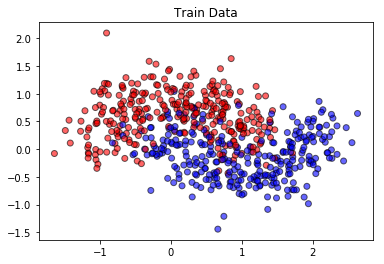

In [7]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[0, :], X_train[1, :], c=y_train.reshape(X_train.shape[1]), 
            cmap=cm_bright, alpha=0.6,edgecolors='k')
plt.title('Train Data')

# Examples of using the model

## Gradient descent optimizer with regularization

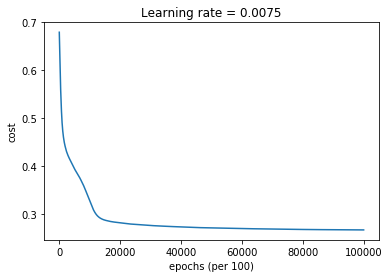

In [8]:
model = Neural_Network(hidden_layer_sizes = [10,7,3], optimizer = 'gradient_descent', 
                       learning_rate = 0.0075, lambd = 1, batch_type = 'batch', 
                       beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, 
                       num_epochs = 100000, print_cost = False, plot_cost = True)
    
model.fit(X_train, y_train)

In [9]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
                       
print(f'Accuracy of train set: {train_score*100}%')
print(f'Accuracy of test set: {test_score*100}%')

Accuracy of train set: 88.66666666666667%
Accuracy of test set: 91.25%


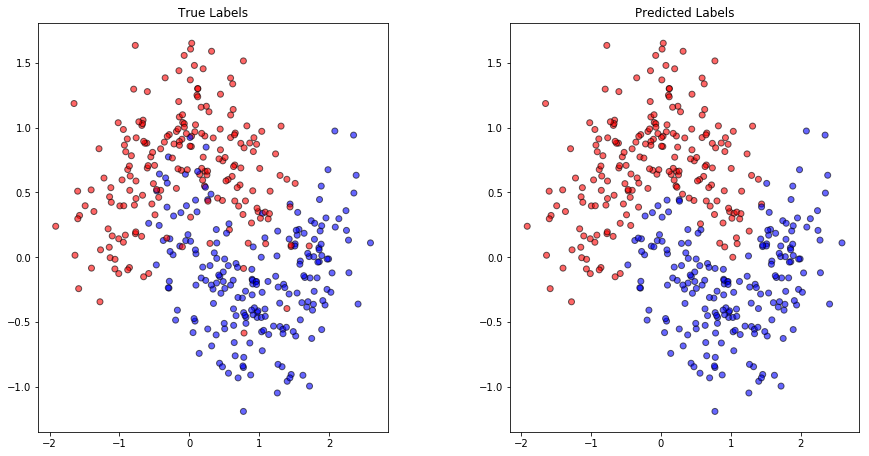

In [10]:
test_pred = model.predict(X_test)

plot_true_labels_vs_predicted_labels(x_axis=X_test[0, :], y_axis=X_test[1, :], 
                                             true_labels=y_test.reshape(X_test.shape[1]), 
                                             predicted_labels=test_pred.reshape(X_test.shape[1]))

## Gradient descent optimizer with regularization and mini-batches

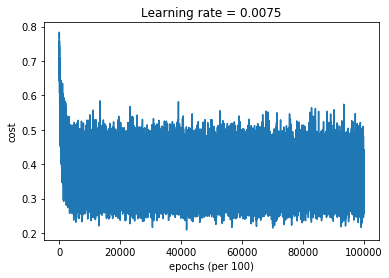

In [11]:
model = Neural_Network(hidden_layer_sizes = [10,7,3], optimizer = 'gradient_descent', 
                       learning_rate = 0.0075, lambd = 1, batch_type = 'mini_batch',
                       mini_batch_size = 128, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  
                       epsilon = 1e-8, num_epochs = 100000, print_cost = False, plot_cost = True)
    
model.fit(X_train, y_train)

In [12]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
                       
print(f'Accuracy of train set: {train_score*100}%')
print(f'Accuracy of test set: {test_score*100}%')

Accuracy of train set: 89.33333333333333%
Accuracy of test set: 90.75%


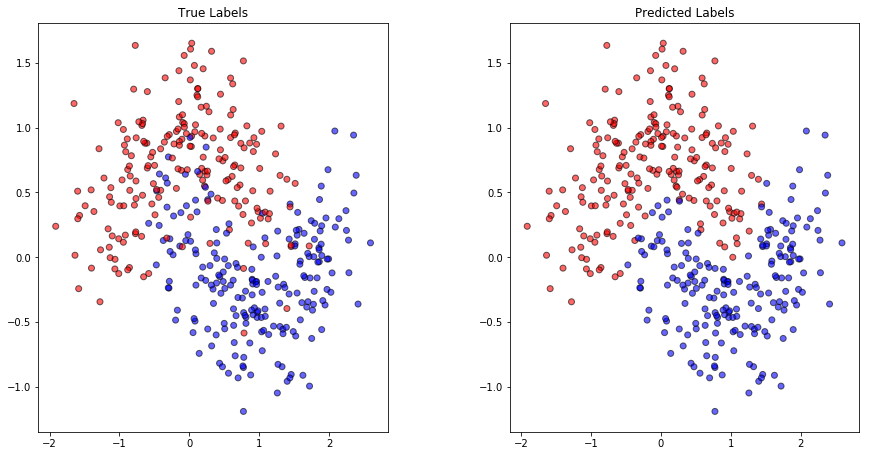

In [13]:
test_pred = model.predict(X_test)

plot_true_labels_vs_predicted_labels(x_axis=X_test[0, :], y_axis=X_test[1, :], 
                                             true_labels=y_test.reshape(X_test.shape[1]), 
                                             predicted_labels=test_pred.reshape(X_test.shape[1]))

## Momentum optimizer with regularization

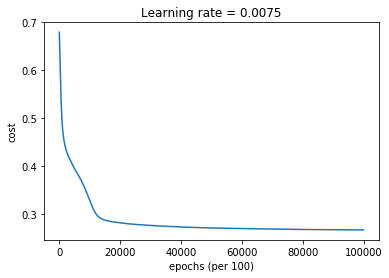

In [14]:
model = Neural_Network(hidden_layer_sizes = [10,7,3], optimizer = 'momentum', 
                       learning_rate = 0.0075, lambd = 1, batch_type = 'batch',
                       mini_batch_size = 128, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  
                       epsilon = 1e-8, num_epochs = 100000, print_cost = False, plot_cost = True)
    
model.fit(X_train, y_train)

In [15]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
                       
print(f'Accuracy of train set: {train_score*100}%')
print(f'Accuracy of test set: {test_score*100}%')

Accuracy of train set: 88.66666666666667%
Accuracy of test set: 91.25%


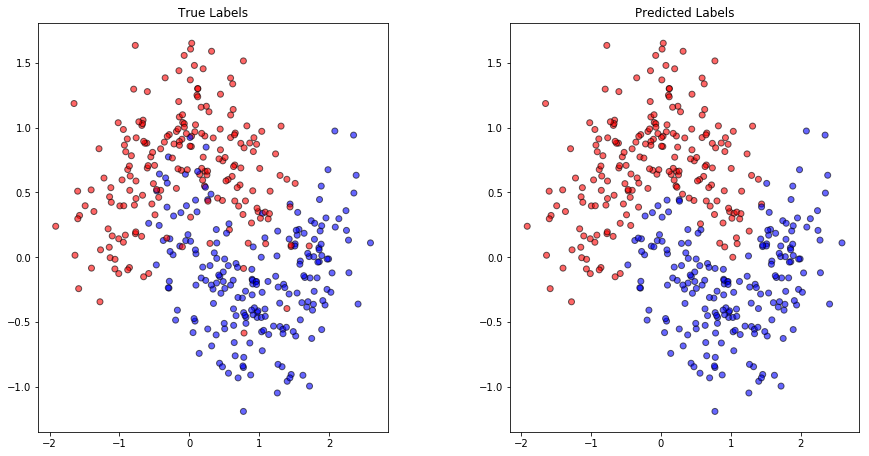

In [16]:
test_pred = model.predict(X_test)

plot_true_labels_vs_predicted_labels(x_axis=X_test[0, :], y_axis=X_test[1, :], 
                                             true_labels=y_test.reshape(X_test.shape[1]), 
                                             predicted_labels=test_pred.reshape(X_test.shape[1]))

## Adam optimizer with regularization

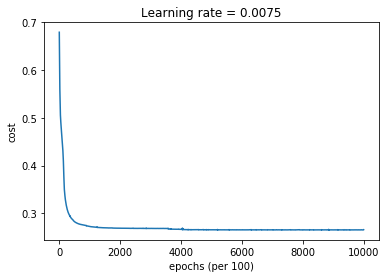

In [17]:
model = Neural_Network(hidden_layer_sizes = [10,7,3], optimizer = 'adam', 
                       learning_rate = 0.0075, lambd = 1, batch_type = 'batch',
                       mini_batch_size = 128, beta = 0.9, beta1 = 0.9, beta2 = 0.999,  
                       epsilon = 1e-8, num_epochs = 10000, print_cost = False, plot_cost = True)
    
model.fit(X_train, y_train)

In [18]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
                       
print(f'Accuracy of train set: {train_score*100}%')
print(f'Accuracy of test set: {test_score*100}%')

Accuracy of train set: 89.16666666666667%
Accuracy of test set: 91.5%


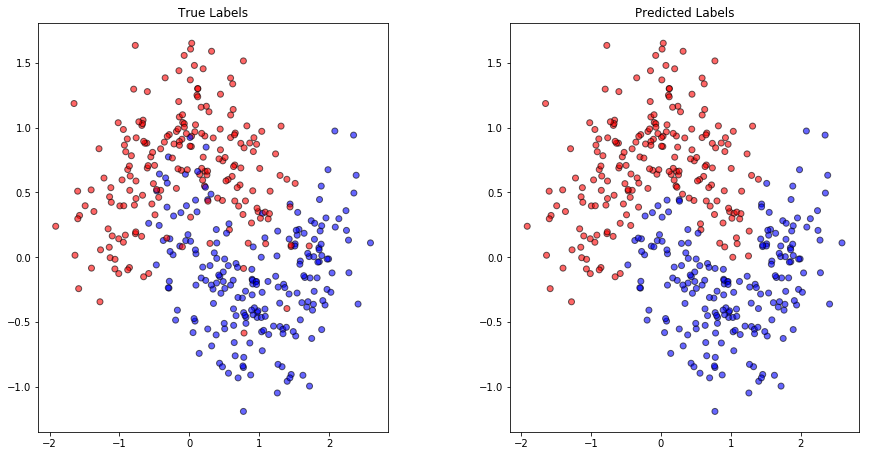

In [19]:
test_pred = model.predict(X_test)

plot_true_labels_vs_predicted_labels(x_axis=X_test[0, :], y_axis=X_test[1, :], 
                                             true_labels=y_test.reshape(X_test.shape[1]), 
                                             predicted_labels=test_pred.reshape(X_test.shape[1]))